<a href="https://colab.research.google.com/github/imad3k/Gas_station_analysis/blob/main/c_store_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
# Import libraries for loading the data and loading the charts

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

# Load Google Drive

In [ ]:
# Reading in the data from google drive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Import the Store Data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/AFIS_Data/test_raw data.csv')

In [ ]:
df.head()

,DATE,DAILY SALE,GROCERY,DAILY DROP,GAS,CREDIT CARD,PAID OUTS,TAX,CASH,CASH TO GAS,LOTTO SALE,LOTTO DROP
0,2016-10-31,2953,1952,0,1061,1121,743,102,1089,0,846.0,-70.0
1,2016-11-01,3526,2068,0,1458,1119,547,112,1510,350,447.0,397.0
2,2016-11-02,2807,1721,0,1086,985,1006,97,816,100,1100.0,190.0
3,2016-11-03,3355,2030,0,1325,1275,1074,115,1006,50,1135.0,430.0
4,2016-11-04,3091,2011,0,1088,1096,492,110,1503,0,1276.0,290.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         413 non-null    object 
 1   DAILY SALE   413 non-null    int64  
 2   GROCERY      413 non-null    int64  
 3   DAILY DROP   413 non-null    int64  
 4   GAS          413 non-null    int64  
 5   CREDIT CARD  413 non-null    int64  
 6   PAID OUTS    413 non-null    int64  
 7   TAX          413 non-null    int64  
 8   CASH         413 non-null    int64  
 9   CASH TO GAS  413 non-null    int64  
 10  LOTTO SALE   399 non-null    float64
 11  LOTTO DROP   403 non-null    float64
dtypes: float64(2), int64(9), object(1)
memory usage: 38.8+ KB


In [ ]:
# Convert Date to datetime object

df.DATE = pd.to_datetime(df.DATE, format = '%Y-%m-%d')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         413 non-null    datetime64[ns]
 1   DAILY SALE   413 non-null    int64         
 2   GROCERY      413 non-null    int64         
 3   DAILY DROP   413 non-null    int64         
 4   GAS          413 non-null    int64         
 5   CREDIT CARD  413 non-null    int64         
 6   PAID OUTS    413 non-null    int64         
 7   TAX          413 non-null    int64         
 8   CASH         413 non-null    int64         
 9   CASH TO GAS  413 non-null    int64         
 10  LOTTO SALE   399 non-null    float64       
 11  LOTTO DROP   403 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(9)
memory usage: 38.8 KB


In [ ]:
# Add in a day of the week column (it'll tell you what day it was, monday, tuesday...)

# List of Weekdays in order
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert Date to a Weekday name
df["Day_of_the_Week"] = pd.Categorical(df["DATE"].dt.day_name(), categories=day_names, ordered=True)

In [ ]:
df.head()

,DATE,DAILY SALE,GROCERY,DAILY DROP,GAS,CREDIT CARD,PAID OUTS,TAX,CASH,CASH TO GAS,LOTTO SALE,LOTTO DROP,Day_of_the_Week
0,2016-10-31,2953,1952,0,1061,1121,743,102,1089,0,846.0,-70.0,Monday
1,2016-11-01,3526,2068,0,1458,1119,547,112,1510,350,447.0,397.0,Tuesday
2,2016-11-02,2807,1721,0,1086,985,1006,97,816,100,1100.0,190.0,Wednesday
3,2016-11-03,3355,2030,0,1325,1275,1074,115,1006,50,1135.0,430.0,Thursday
4,2016-11-04,3091,2011,0,1088,1096,492,110,1503,0,1276.0,290.0,Friday


In [ ]:
# Adding in a Week Number column

df['Week_Number'] = df['DATE'].dt.isocalendar().week

In [ ]:
df.tail()


,DATE,DAILY SALE,GROCERY,DAILY DROP,GAS,CREDIT CARD,PAID OUTS,TAX,CASH,CASH TO GAS,LOTTO SALE,LOTTO DROP,Day_of_the_Week,Week_Number
408,2018-01-03,3426,1884,150,1542,1135,204,77,1530,407,1065.0,315.0,Wednesday,1
409,2018-01-04,3680,2034,0,1646,1437,2009,73,34,200,800.0,94.0,Thursday,1
410,2018-01-05,3874,1954,100,1920,1596,738,80,1116,324,640.0,410.0,Friday,1
411,2018-01-06,3220,1627,100,1593,1407,0,45,1527,186,1251.0,819.0,Saturday,1
412,2018-01-07,2724,1306,100,1318,933,0,34,1306,385,821.0,0.0,Sunday,1


In [ ]:
# Add a month column 

# List of the names of Months in order
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create the new month Column thats in order
df["Month"] = pd.Categorical(df["DATE"].dt.month_name(), categories=month_names, ordered=True)

In [ ]:
df.head()

,DATE,DAILY SALE,GROCERY,DAILY DROP,GAS,CREDIT CARD,PAID OUTS,TAX,CASH,CASH TO GAS,LOTTO SALE,LOTTO DROP,Day_of_the_Week,Week_Number,Month
0,2016-10-31,2953,1952,0,1061,1121,743,102,1089,0,846.0,-70.0,Monday,44,October
1,2016-11-01,3526,2068,0,1458,1119,547,112,1510,350,447.0,397.0,Tuesday,44,November
2,2016-11-02,2807,1721,0,1086,985,1006,97,816,100,1100.0,190.0,Wednesday,44,November
3,2016-11-03,3355,2030,0,1325,1275,1074,115,1006,50,1135.0,430.0,Thursday,44,November
4,2016-11-04,3091,2011,0,1088,1096,492,110,1503,0,1276.0,290.0,Friday,44,November


# Data Visualization
## <br> 1. Removing the Daily Sale column because its an aggregate of Grocery + Gas

In [ ]:
# create a list of columns to keep
columns_to_keep =  ['DATE',
                    'GROCERY',
                    'GAS',
                    'CREDIT CARD',
                    'PAID OUTS',
                    'TAX',
                    'CASH',
                    'CASH TO GAS',
                    'Day_of_the_Week',
                    'Week_Number',
                    'Month']

In [ ]:
# redefine the gdf with only columns to keep
df = df[columns_to_keep]

In [ ]:
df.head()

,DATE,GROCERY,GAS,CREDIT CARD,PAID OUTS,TAX,CASH,CASH TO GAS,Day_of_the_Week,Week_Number,Month
0,2016-10-31,1952,1061,1121,743,102,1089,0,Monday,44,October
1,2016-11-01,2068,1458,1119,547,112,1510,350,Tuesday,44,November
2,2016-11-02,1721,1086,985,1006,97,816,100,Wednesday,44,November
3,2016-11-03,2030,1325,1275,1074,115,1006,50,Thursday,44,November
4,2016-11-04,2011,1088,1096,492,110,1503,0,Friday,44,November


# Simple Statistics

## Monthly Grocery Average

In [ ]:
# Monthly Averages

month_avgs = pd.DataFrame(df.groupby('Month')['GROCERY'].mean())
month_avgs

,GROCERY
Month,
January,1700.421053
February,1823.214286
March,1965.100000
April,2043.266667
May,2096.870968
June,2129.166667
July,2049.451613
August,2045.419355
September,2005.366667


## Grocery Average by Day of the Week

In [ ]:
# Daily Averages
day_avgs = pd.DataFrame(df.groupby('Day_of_the_Week')['GROCERY'].mean())
day_avgs

,GROCERY
Day_of_the_Week,
Monday,1853.372881
Tuesday,1848.525424
Wednesday,1906.949153
Thursday,1998.389831
Friday,2230.000000
Saturday,1934.762712
Sunday,1765.728814


## Day of the Week Grocery Average in each Month

In [ ]:
# Monthly/Day of the Week Averages

# Set Pandas Options to display more rows
pd.set_option('max_row', None)

# Group by Month and Day of the week
avgs = pd.DataFrame(df.groupby(['Month','Day_of_the_Week'])['GROCERY'].mean())
avgs.head(84)

GROCERY
Month     Day_of_the_Week             
January   Monday           1559.666667
          Tuesday          1675.333333
          Wednesday        1659.000000
          Thursday         2016.000000
          Friday           2019.200000
          Saturday         1642.200000
          Sunday           1420.666667
February  Monday           1585.000000
          Tuesday          1851.000000
          Wednesday        1819.250000
          Thursday         1891.250000
          Friday           2176.250000
          Saturday         1692.250000
          Sunday           1747.500000
March     Monday           1852.000000
          Tuesday          1759.000000
          Wednesday        2019.000000
          Thursday         1884.500000
          Friday           2268.000000
          Saturday         1745.000000
          Sunday           1952.000000
April     Monday           1889.500000
          Tuesday          1950.250000
          Wednesday        1942.250000
          Thursday         1980.500000
          Friday           2340.750000
          Saturday         2196.400000
          Sunday           1980.600000
May       Monday           2051.400000
          Tuesday          2096.600000
          Wednesday        2099.800000
          Thursday         1902.750000
          Friday           2405.750000
          Saturday         2132.750000
          Sunday           1999.750000
June      Monday           2138.750000
          Tuesday          1947.000000
          Wednesday        1884.000000
          Thursday         2277.400000
          Friday           2449.200000
          Saturday         2142.750000
          Sunday           1948.000000
July      Monday           1949.000000
          Tuesday          1877.000000
          Wednesday        2185.750000
          Thursday         2122.000000
          Friday           2452.250000
          Saturday         2083.200000
          Sunday           1764.800000
August    Monday           1942.250000
          Tuesday          2049.400000
          Wednesday        1971.400000
          Thursday         2061.000000
          Friday           2236.500000
          Saturday         2191.750000
          Sunday           1879.250000
September Monday           1742.000000
          Tuesday          1883.750000
          Wednesday        1971.750000
          Thursday         2113.500000
          Friday           2378.200000
          Saturday         2000.200000
          Sunday           1856.250000
October   Monday           1755.333333
          Tuesday          1928.800000
          Wednesday        1938.000000
          Thursday         2123.750000
          Friday           2208.250000
          Saturday         2115.500000
          Sunday           1666.800000
November  Monday           1955.000000
          Tuesday          1773.222222
          Wednesday        1901.500000
          Thursday         1890.888889
          Friday           1995.875000
          Saturday         1637.375000
          Sunday           1704.375000
December  Monday           1846.875000
          Tuesday          1610.375000
          Wednesday        1730.250000
          Thursday         1867.888889
          Friday           2155.500000
          Saturday         1859.700000
          Sunday           1698.111111

# Grocery Sales Visualized

Text(0.5, 6.799999999999997, 'Grocery Sales')

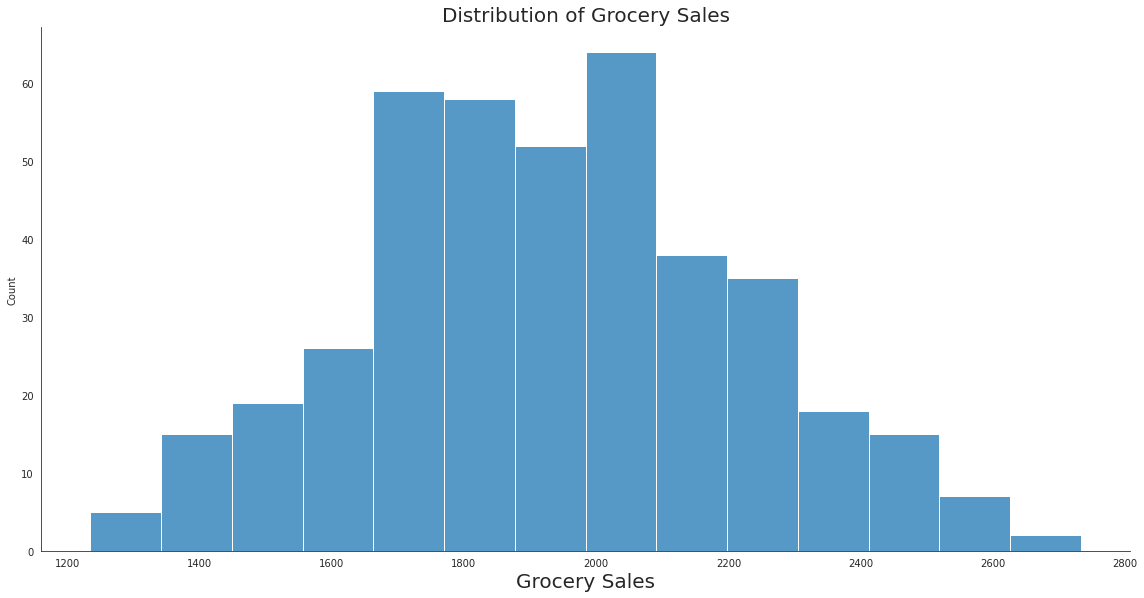

In [ ]:
# Distribution of Grocery sales


sns.set_style("white")
sns.displot(df, x="GROCERY", height = 8, aspect = 2, palette="deep")
plt.title('Distribution of Grocery Sales', fontsize = 20)
plt.xlabel('Grocery Sales', fontsize = 20)


Text(0.5, 0, '')

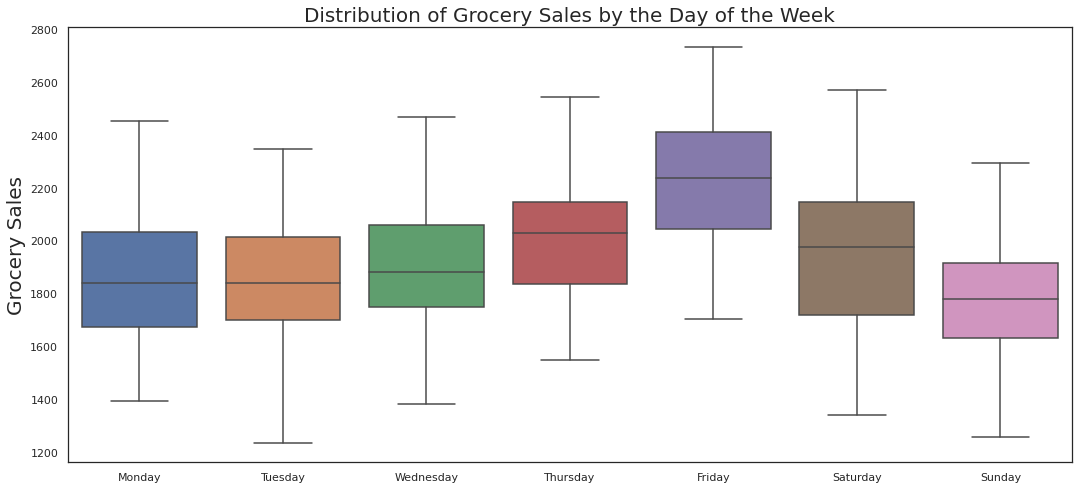

In [ ]:
# Box plot of grocery sales by the day of the week

sns.set(rc={"figure.figsize":(18, 8)}) #width=18, height=8
sns.set_style("white")
sns.boxplot(x='Day_of_the_Week', y='GROCERY', data=df)
plt.title('Distribution of Grocery Sales by the Day of the Week', fontsize = 20)
plt.ylabel('Grocery Sales', fontsize = 20)
plt.xlabel('')

Text(0, 0.5, 'Average Grocery Sale Amount')

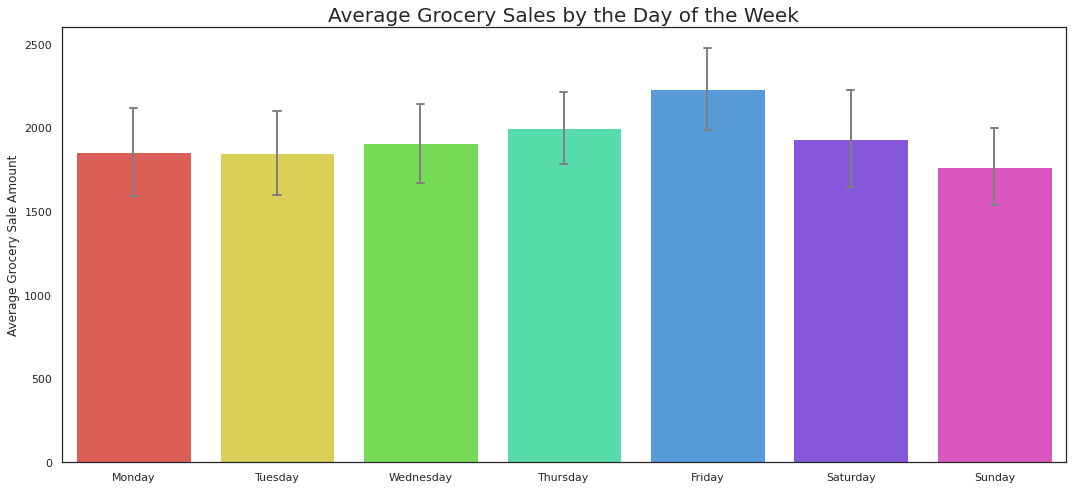

In [ ]:
# Use Group by to see the mean grocery sales for each day

# dfg = df.groupby(['Day_of_the_Week'])['GROCERY'].mean()

# sns.set(rc={"figure.figsize":(18, 8)}) #width=18, height=8
# sns.set_style("white")
# dfg.plot(kind='bar', title='Average Grocery Sales by Day of the Week', ylabel='Average Grocery Sales',
#         xlabel='Day of the Week', color = 'pink')


sns.barplot(x = 'Day_of_the_Week', y = 'GROCERY', data = df,
            palette = 'hls',  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
plt.title('Average Grocery Sales by the Day of the Week', fontsize = 20)
plt.xlabel('')
plt.ylabel('Average Grocery Sale Amount')

Text(0.5, 0, '')

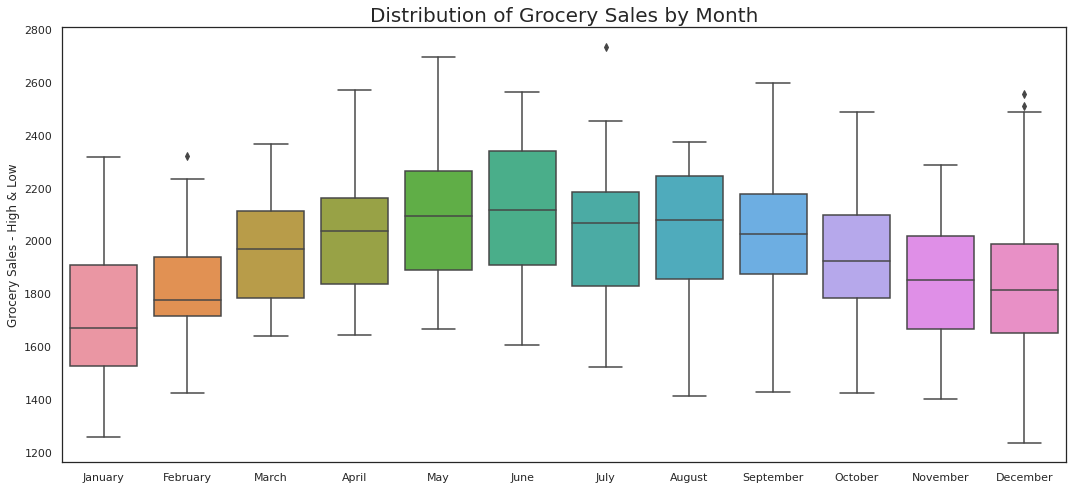

In [ ]:
# Distribution of Grocery sales by month

sns.set(rc={"figure.figsize":(18, 8)}) #width=18, height=8
sns.set_style("white")
sns.boxplot(x='Month', y='GROCERY', data=df)
plt.title('Distribution of Grocery Sales by Month', fontsize = 20)
plt.ylabel('Grocery Sales - High & Low')
plt.xlabel('')

Text(0, 0.5, 'Average Grocery Sales')

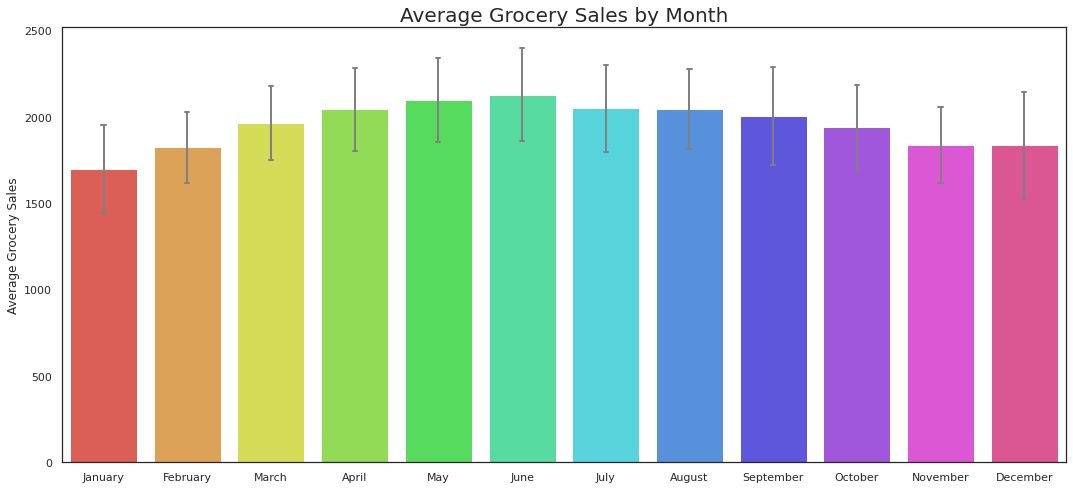

In [ ]:
# Grocery Sales by Month

sns.barplot(x = 'Month', y = 'GROCERY', data = df,
            palette = 'hls',  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
plt.title('Average Grocery Sales by Month', fontsize = 20)
plt.xlabel('')
plt.ylabel('Average Grocery Sales')

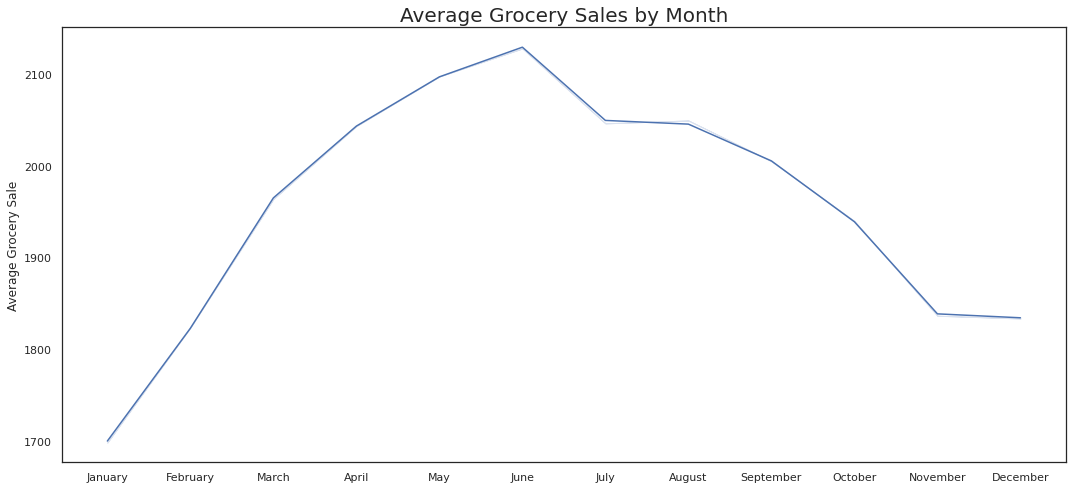

In [ ]:
# Plot Average Grocery Sales by Month

sns.set(rc={"figure.figsize":(18, 8)}) #width=18, height=8
sns.set_style("white")
sns.lineplot(x = 'Month', y = 'GROCERY', data = df, ci = False)
plt.title('Average Grocery Sales by Month', fontsize = 20)
plt.xlabel('')
plt.ylabel('Average Grocery Sale')
plt.show()

# Visualizing Gas Sales

Text(0.5, 8.960000000000022, 'Gas Sales')

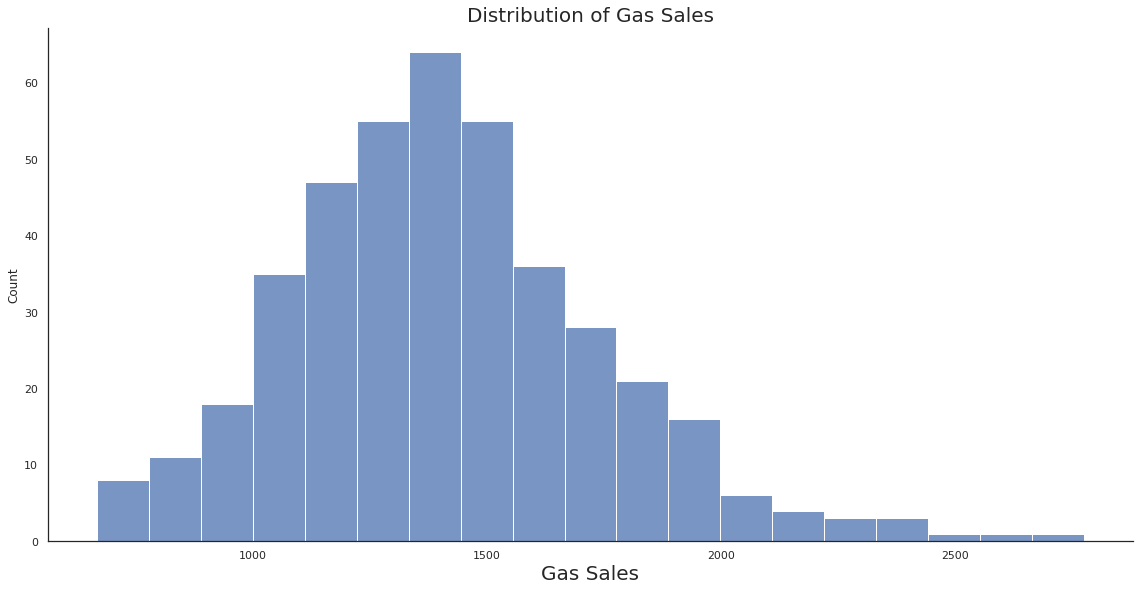

In [ ]:
# Plot Gas Sales distribution

# Setup Variables

mon = df[df['Day_of_the_Week'] == 'Monday']
tue = df[df['Day_of_the_Week'] == 'Tuesday']
wed = df[df['Day_of_the_Week'] == 'Wednesday']
thurs = df[df['Day_of_the_Week'] == 'Thursday']
fri = df[df['Day_of_the_Week'] == 'Friday']
sat = df[df['Day_of_the_Week'] == 'Saturday']
sun = df[df['Day_of_the_Week'] == 'Sunday']

sns.set_style("white")
sns.displot(df, x="GAS", height = 8, aspect = 2, palette="deep")
plt.title('Distribution of Gas Sales', fontsize = 20)
plt.xlabel('Gas Sales', fontsize = 20)

Text(0, 0.5, 'Average Gas Sale Amount')

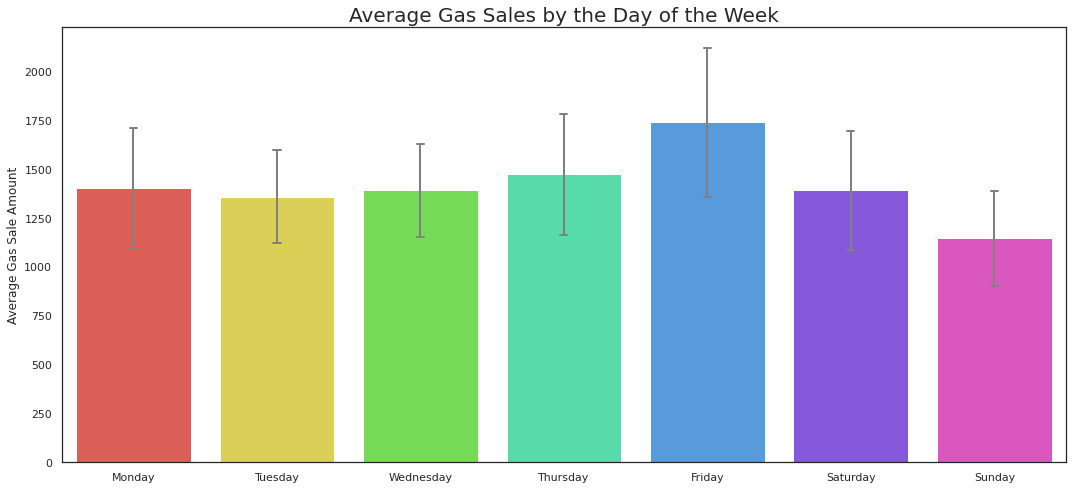

In [ ]:
# Use Group by to see the mean grocery sales for each day

# dfg = df.groupby(['Day_of_the_Week'])['GROCERY'].mean()

# sns.set(rc={"figure.figsize":(18, 8)}) #width=18, height=8
# sns.set_style("white")
# dfg.plot(kind='bar', title='Average Grocery Sales by Day of the Week', ylabel='Average Grocery Sales',
#         xlabel='Day of the Week', color = 'pink')


sns.barplot(x = 'Day_of_the_Week', y = 'GAS', data = df,
            palette = 'hls',  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
plt.title('Average Gas Sales by the Day of the Week', fontsize = 20)
plt.xlabel('')
plt.ylabel('Average Gas Sale Amount')

Text(0.5, 0, '')

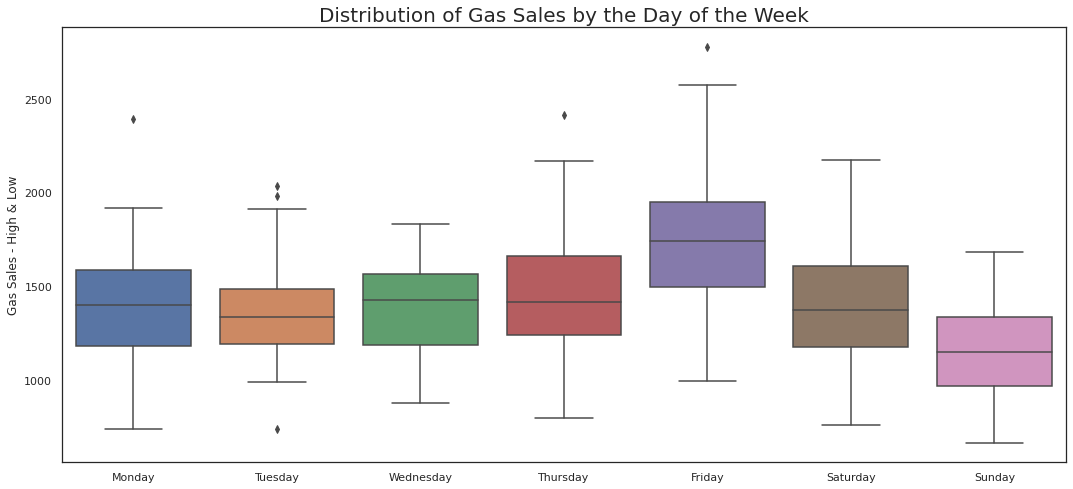

In [ ]:
# Box plot of gas sales by the day of the week

sns.set(rc={"figure.figsize":(18, 8)}) #width=18, height=8
sns.set_style("white")
sns.boxplot(x='Day_of_the_Week', y='GAS', data=df)
plt.title('Distribution of Gas Sales by the Day of the Week', fontsize = 20)
plt.ylabel('Gas Sales - High & Low')
plt.xlabel('')

Text(0, 0.5, 'Average Gas Sale')

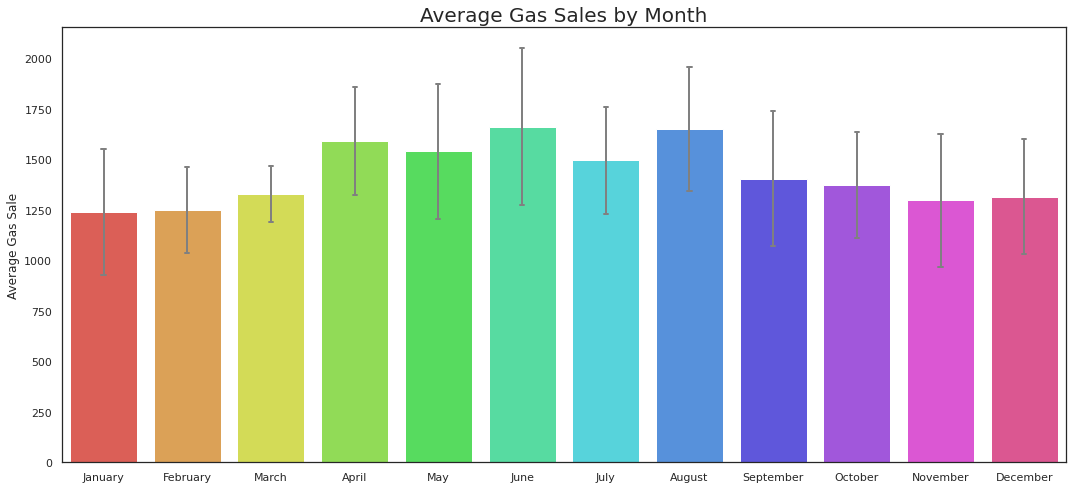

In [ ]:
# Use Group by to see the mean grocery sales for each day

sns.barplot(x = 'Month', y = 'GAS', data = df,
            palette = 'hls',  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
plt.title('Average Gas Sales by Month', fontsize = 20)
plt.xlabel('')
plt.ylabel('Average Gas Sale')

Text(0.5, 0, '')

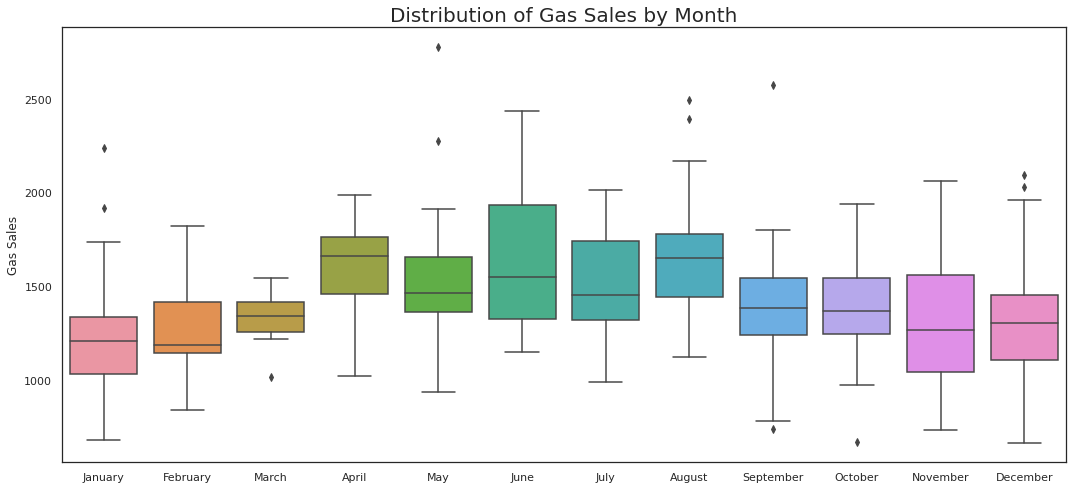

In [ ]:
# Box plot of gas sales by the month

sns.set(rc={"figure.figsize":(18, 8)}) #width=18, height=8
sns.set_style("white")
sns.boxplot(x='Month', y='GAS', data=df)
plt.title('Distribution of Gas Sales by Month', fontsize = 20)
plt.ylabel('Gas Sales')
plt.xlabel('')

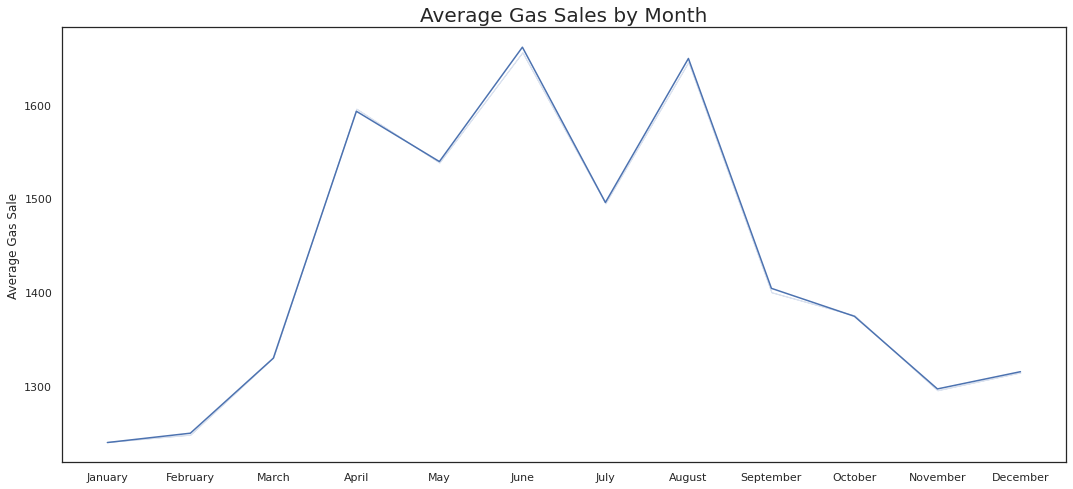

In [ ]:
# Plot Gas Sales by Month

sns.set(rc={"figure.figsize":(18, 8)}) #width=18, height=8
sns.set_style("white")
sns.lineplot(x = 'Month', y = 'GAS', data = df, ci = False)
plt.title('Average Gas Sales by Month', fontsize = 20)
plt.xlabel('')
plt.ylabel('Average Gas Sale')
plt.show()

# Correlation Study

## Are Gas and Grocery Sales Correlated?

Text(0.5, 0, 'Grocery Sales')

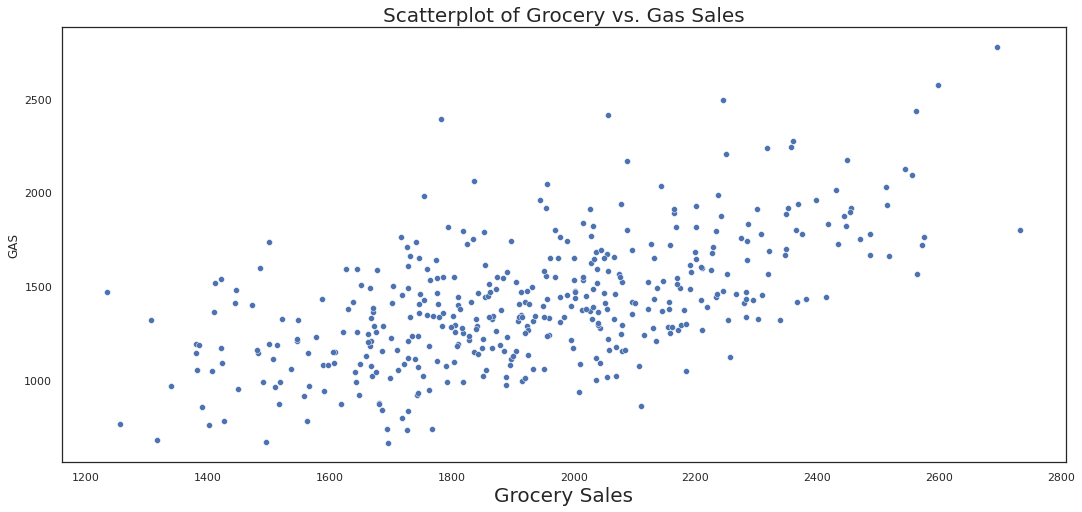

In [ ]:
# Any correlation between Grocery and Gas Sales?

sns.set(rc={"figure.figsize":(18, 8)}) #width=18, height=8
sns.set_style("white")
sns.scatterplot(x=df['GROCERY'], y=df['GAS'])
plt.title('Scatterplot of Grocery vs. Gas Sales', fontsize = 20)
plt.xlabel('Grocery Sales', fontsize = 20)

In [ ]:
# Lets calculate the mean and standard deviation of both Grocery and Gas Sales

grocery_data = df['GROCERY']
mean_grocery = np.mean(df['GROCERY'])
std_grocery = np.std(df["GROCERY"])

gas_data = df["GAS"]
mean_gas = np.mean(df['GAS'])
std_gas = np.std(df["GAS"])


print('Statistical Summary')
print('Grocery Sales: mean = %.3f , standard deviation = %.3f' % (np.mean(df['GROCERY']), np.std(df["GROCERY"])))
print('Gas Sales: mean= % .3f , standard deviation = %.3f' % (np.mean(df['GAS']), np.std(df["GAS"])))

Statistical Summary
Grocery Sales: mean = 1933.961 , standard deviation = 284.375
Gas Sales: mean=  1413.545 , standard deviation = 334.358


In [ ]:
correlation = grocery_data.corr(gas_data)
print('The correlation between Grocery and Gas Sales = ', correlation)
print('There seems to be some correlation, but not much.')

The correlation between Grocery and Gas Sales =  0.5901301788809776
There seems to be some correlation, but not much.


# Correlation Matrix

Text(0.5, 1.0, 'Heatmap: Correlations Among the Variables (columns) in our Data Set')

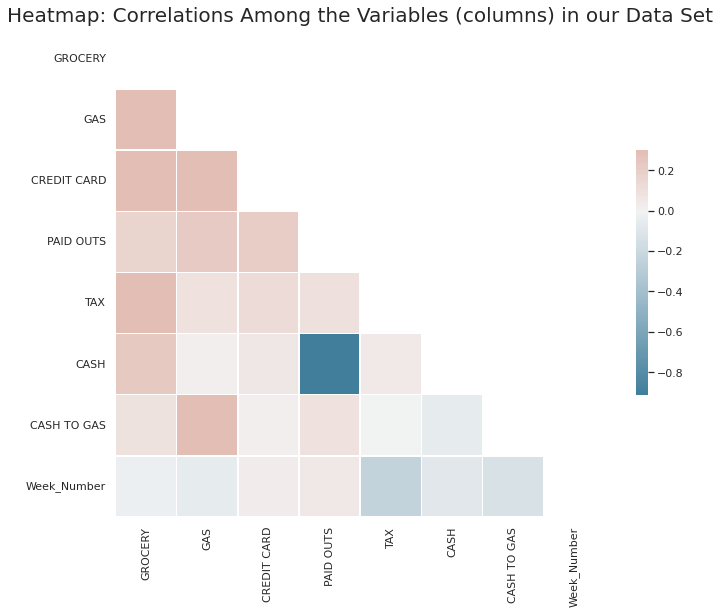

In [ ]:
# Exploring (if any) correlations among other variables (columns)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap: Correlations Among the Variables (columns) in our Data Set', fontsize = 20)


## The Correlogram below charts out a scatter plot of variables compared to each other (pair wise scatter plots).

<br> Correlograms provide a quick way to see if any of your variables are correlated. When performing linear regression it is best to remove any variables that are highly correlated.

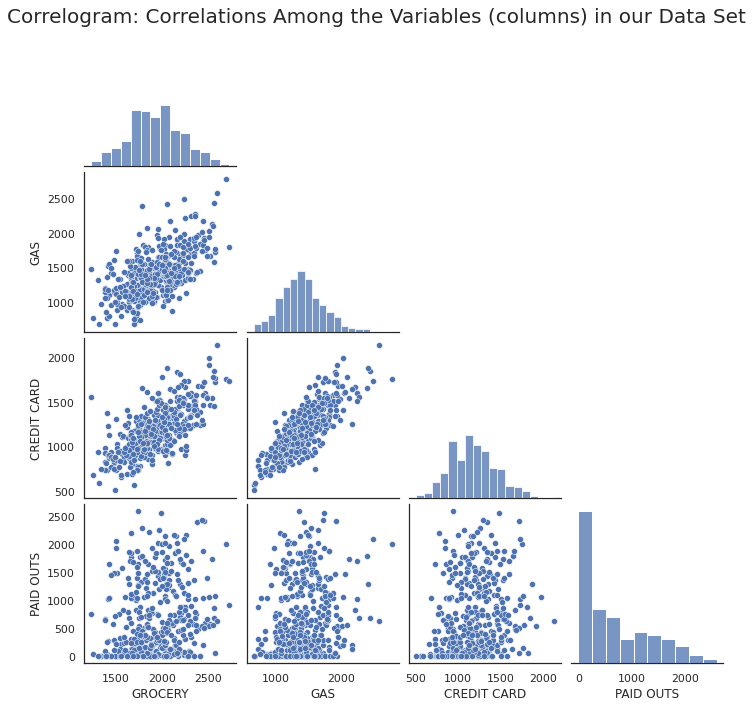

In [ ]:
# Basic correlogram


sns.pairplot(df,
             # hue='Day_of_the_Week',
             diag_kind="hist",
             x_vars=["GROCERY", "GAS", "CREDIT CARD", "PAID OUTS"],
             y_vars=["GROCERY", "GAS", "CREDIT CARD", "PAID OUTS"],
             corner=True)

plt.suptitle('Correlogram: Correlations Among the Variables (columns) in our Data Set', fontsize = 20)

plt.show()